In [46]:
import pandas as pd
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from random import randrange, uniform
%matplotlib inline

In [47]:
matchs = pd.read_csv("matchs4.csv", sep=',')
champions = pd.read_csv('dataChampions.csv', sep='/')
matchs = matchs.drop('Unnamed: 0', 1)
champions = champions.drop('Unnamed: 0', 1)

In [ ]:
matchs_kda = matchs.drop('team', 1)

for a in matchs_kda.index:
    matchs_kda.champion1[a]=(champions.kills.loc[(champions['champion']==matchs.champion1[a])\
                                                      & (champions['role']=='Top')].values[0]) - \
    (champions.death.loc[(champions['champion']==matchs.champion1[a]) & (champions['role']=='Top')].values[0])
    
    matchs_kda.champion2[a]=(champions.kills.loc[(champions['champion']==matchs.champion2[a])\
                                                     & (champions['role']=='Jungle')].values[0]) - \
    (champions.death.loc[(champions['champion']==matchs.champion2[a])\
                                                     & (champions['role']=='Jungle')].values[0])
    
    matchs_kda.champion3[a]=(champions.kills.loc[(champions['champion']==matchs.champion3[a])\
                                                     & (champions['role']=='Middle')].values[0]) - \
    (champions.death.loc[(champions['champion']==matchs.champion2[a])\
                                                     & (champions['role']=='Jungle')].values[0])
    
    matchs_kda.champion4[a]=(champions.kills.loc[(champions['champion']==matchs.champion4[a])\
                                                     & (champions['role']=='ADC')].values[0]) - \
    (champions.death.loc[(champions['champion']==matchs.champion4[a])\
                                                     & (champions['role']=='ADC')].values[0])
    
    matchs_kda.champion5[a]=(champions.kills.loc[(champions['champion']==matchs.champion5[a])\
                                                     & ((champions['role']=='Support') | (champions['role']=='Top'))].values[0]) -\
    (champions.death.loc[(champions['champion']==matchs.champion5[a])\
                                                     & ((champions['role']=='Support') | (champions['role']=='Top'))].values[0])
matchs_kda.status1 = matchs_winRate["status1"].replace(['defeat'], 0)
matchs_kda.status1 = matchs_winRate["status1"].replace(['victory'], 1)

In [ ]:
matchs_winRate = matchs.drop('team', 1)

for a in matchs_winRate.index:
    matchs_winRate.champion1[a]=champions.winRate.loc[(champions['champion']==matchs.champion1[a])\
                                                      & (champions['role']=='Top')].values[0]
    matchs_winRate.champion2[a]=champions.winRate.loc[(champions['champion']==matchs.champion2[a])\
                                                     & (champions['role']=='Jungle')].values[0]
    matchs_winRate.champion3[a]=champions.winRate.loc[(champions['champion']==matchs.champion3[a])\
                                                     & (champions['role']=='Middle')].values[0]
    matchs_winRate.champion4[a]=champions.winRate.loc[(champions['champion']==matchs.champion4[a])\
                                                     & (champions['role']=='ADC')].values[0]
    matchs_winRate.champion5[a]=champions.winRate.loc[(champions['champion']==matchs.champion5[a])\
                                                     & ((champions['role']=='Support') | (champions['role']=='Top'))].values[0]
matchs_winRate.status1 = matchs_winRate["status1"].replace(['defeat'], 0)
matchs_winRate.status1 = matchs_winRate["status1"].replace(['victory'], 1)

In [57]:
matchs_analisys = pd.DataFrame(index=range(58),columns=["winRate", "result", "gold", "kda"])
for a in matchs_winRate.index:
    matchs_analisys.winRate[a]=np.mean([matchs_winRate["champion1"][a], matchs_winRate["champion2"][a],\
                                       matchs_winRate["champion3"][a], matchs_winRate["champion4"][a],\
                                       matchs_winRate["champion5"][a]], dtype=np.float64)
    matchs_analisys.result[a]=matchs_winRate.status1[a]
    matchs_analisys.gold[a]=matchs_winRate.gold[a]
    matchs_analisys.kda[a]=np.mean([matchs_kda["champion1"][a], matchs_kda["champion2"][a],\
                                       matchs_kda["champion3"][a], matchs_kda["champion4"][a],\
                                       matchs_kda["champion5"][a]], dtype=np.float64)

x=matchs_analisys.winRate.loc[matchs_analisys["result"]==0].values    
y=matchs_analisys.winRate.loc[matchs_analisys["result"]==1].values
matchs_analisys1 = pd.DataFrame(x, columns=["winRate"])
matchs_analisys2 = pd.DataFrame(y, columns=["winRate"])
matchs_analisys1["goldEarned"]=matchs_analisys.gold.loc[matchs_analisys["result"]==0].values    
matchs_analisys2["goldEarned"]=matchs_analisys.gold.loc[matchs_analisys["result"]==1].values
matchs_analisys1["kda"]=matchs_analisys.kda.loc[matchs_analisys["result"]==0].values    
matchs_analisys2["kda"]=matchs_analisys.kda.loc[matchs_analisys["result"]==1].values

,winRate,result,gold,kda
0,0.4896,0,74.5,-0.834
1,0.50382,1,85.1,-0.304
2,0.50856,0,80.4,-0.048
3,0.51866,1,79.3,-0.322
4,0.51354,1,100.3,-0.258
5,0.50488,0,107.3,-0.248
6,0.50452,0,69,-0.732
7,0.53086,1,76.2,0.316
8,0.49546,1,54.2,-0.162
9,0.5064,0,35.4,-0.146


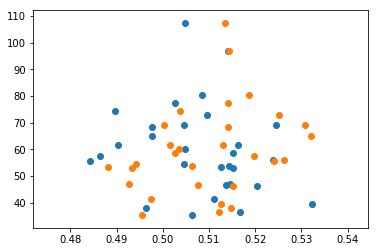

In [52]:
fig = plt.subplots(1,figsize=(6,4)) 
plt.scatter(x=matchs_analisys1['winRate'], y=matchs_analisys1['goldEarned'])
plt.scatter(x=matchs_analisys2['winRate'], y=matchs_analisys1['goldEarned'])

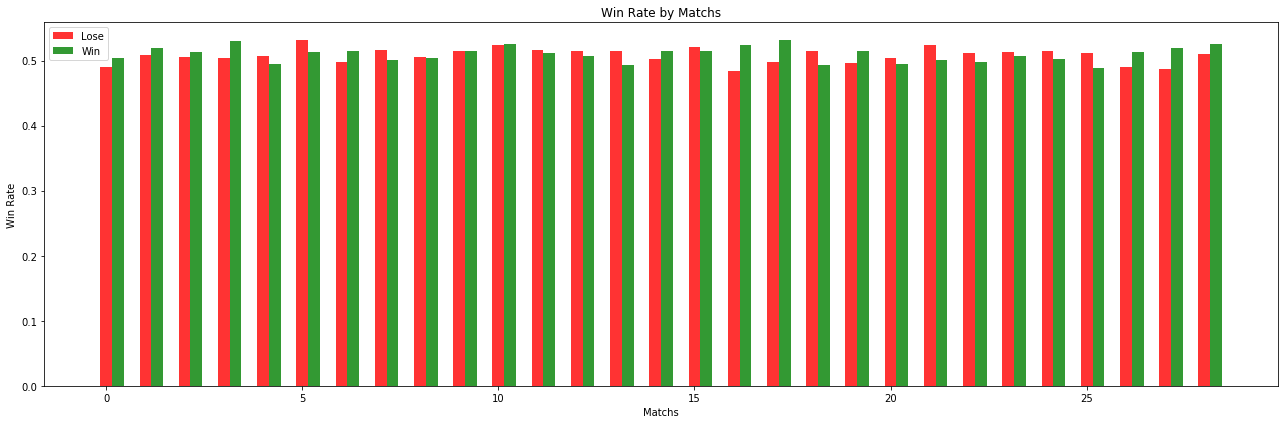

In [53]:
N = 29
winRate1 = np.array(matchs_analisys1['winRate'])
winRate2 = np.array(matchs_analisys2['winRate'])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('Win Rate')
plt.title('Win Rate by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()


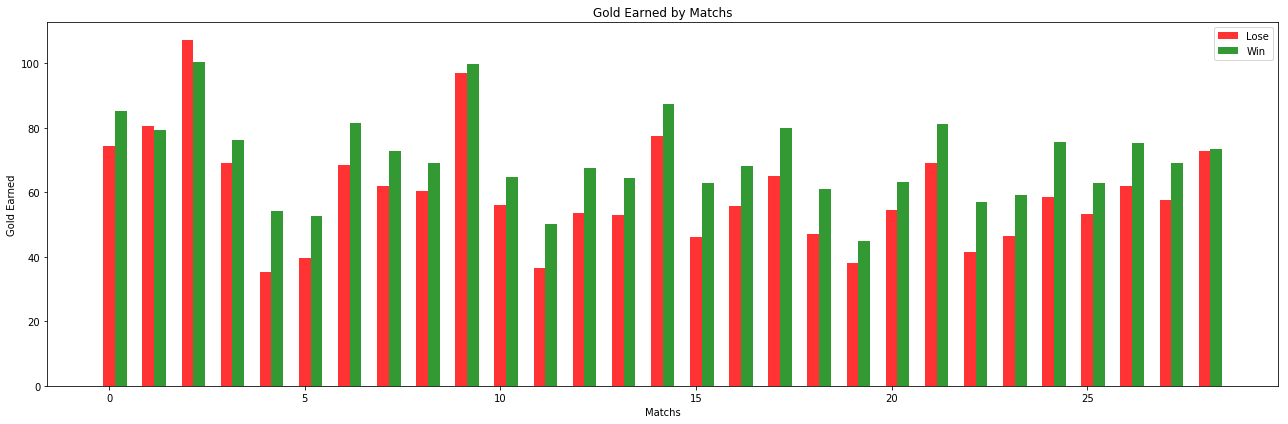

In [54]:
N = 29
winRate1 = np.array(matchs_analisys1['goldEarned'])
winRate2 = np.array(matchs_analisys2['goldEarned'])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('Gold Earned')
plt.title('Gold Earned by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()

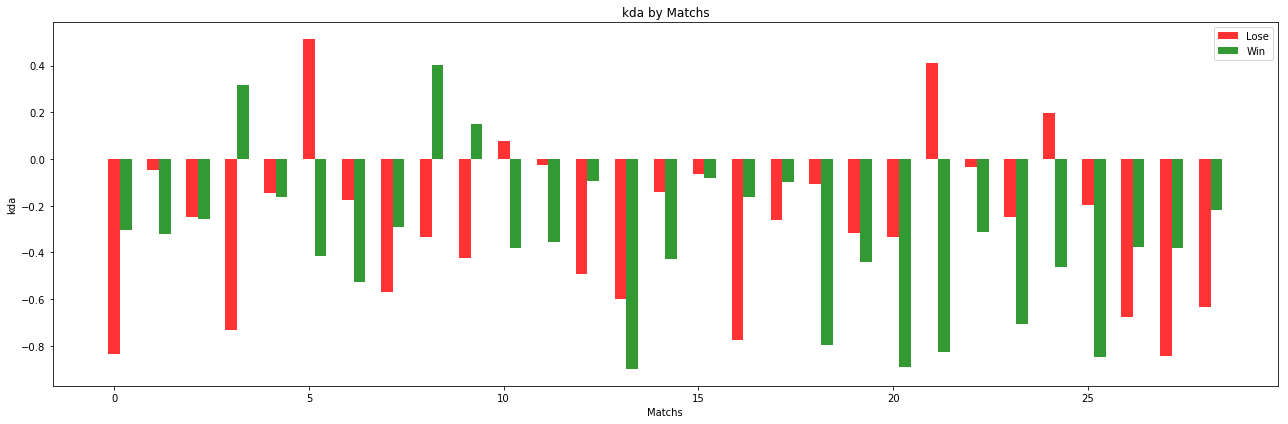

In [58]:
N = 29
winRate1 = np.array(matchs_analisys1['kda'])
winRate2 = np.array(matchs_analisys2['kda'])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('kda')
plt.title('kda by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()